In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
import os
import re
import time 

# Importing the Data
This data was taken from the webrobots.io scrape of the kickstarter.com page. I've pulled together data from four different scrape dates (2/16, 2/17, 2/18, and 2/19) and done some initial cleaning. <br><br>For more information on the original dataset and the steps taken for data cleaning, please see the project repository of github <a href = "https://github.com/pezLyfe/TuftsDataScience">here</a>

In [2]:
start = time.time()
df = pd.DataFrame() #Initialize a dataframe
for filename in os.listdir(): #Create an iterator for all objects in the working directory
    try: #I'm using try/except here because I'm lazy and didn't clean out the folder
        df = df.append(pd.read_csv(filename), ignore_index = False) #When python finds a valid .csv file, append it
        end = time.time()
        print((end - start), filename, len(df)) #Print the filename and the total # of rows so far to track progress
    except:
        end = time.time()
        print((end - start),'Python file') #Print some message when something is wrong    

0.008048772811889648 Python file
2.142122507095337 2016Cleaned.csv 152455
4.739030122756958 2017Cleaned.csv 327540
7.769051790237427 2018Cleaned.csv 523154
11.14200234413147 2019Cleaned.csv 731628
11.150022745132446 Python file


# De-duplicating Entries
The scraping method used by webrobots includes historical projects, so each scrape date will likely contain duplicates of previous projects

Additionally, the scrape is done by searching through each sub-category in Kickstarter's organization structure. Since a project can be listed under multiple sub-categories of a single parent category, there will be mupltiple entries of the same project via this method as well. 

Let's determine the extent of the duplicates

In [3]:
start = time.time()
df.reset_index(inplace = True)
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
df.drop(labels = 'index', axis = 1, inplace = True)
end = time.time()
print(end - start)
df.head()

0.8811798095703125


,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,id,...,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged
0,9,Funds towards exhibiting photography at an Art...,"['Conceptual Art', 'art/conceptual art']",GB,1365783741,"['Interlope (Ali Farmer)', '765699764']",GBP,1368652795,300.0,64486721,...,Along The Lines Of...,300.0,along-the-lines-of,True,False,successful,1368652795,1.53414,https://www.kickstarter.com/projects/765699764...,460.241994
1,5,This is Portrait of #NOW. I'm going to make a ...,"['Conceptual Art', 'art/conceptual art']",US,1313619704,"['Tom Schreiber', '544719087']",USD,1314486963,500.0,755137951,...,Portrait of #NOW,595.0,portrait-of-now,True,False,successful,1314486965,1.00000,https://www.kickstarter.com/projects/544719087...,595.000000
2,15,"Hope, faith, superstition, expectation, disapp...","['Conceptual Art', 'art/conceptual art']",US,1352126529,"['Richard Minsky', '1506051579']",USD,1355377577,300.0,796895846,...,A Dollar and a Dream,1071.0,a-dollar-and-a-dream-0,True,False,successful,1355377577,1.00000,https://www.kickstarter.com/projects/150605157...,1071.000000
3,40,Sharing an interactive postal-art project with...,"['Conceptual Art', 'art/conceptual art']",US,1372738515,"['Yael Roberts', '70316641']",USD,1379563140,1600.0,2136864323,...,Correspondences: The Exhibition,1735.0,correspondences-the-exhibition,True,False,successful,1379563143,1.00000,https://www.kickstarter.com/projects/yaelrober...,1735.000000
4,17,What is Utopia and who gets to decide? Is ther...,"['Conceptual Art', 'art/conceptual art']",US,1360082467,"['Emily L Vosburgh', '1511559983']",USD,1363119207,750.0,989395377,...,Abstraction of Utopia,760.0,abstraction-of-utopia,True,False,successful,1363119208,1.00000,https://www.kickstarter.com/projects/151155998...,760.000000


In [5]:
df.tail() #Check that the indices at the end of the dataframe match as well

,index,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,...,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged
731623,731623,4,"An assortment of herbs, clays, salts, butters,...","['DIY', 'crafts/diy']",US,1482342519,"['Amber Oliver', '1884940353']",USD,1487702405,7600.0,...,Monthly Herbal Boxes!,311.0,monthly-herbal-boxes,False,False,failed,1487702405,1.000000,https://www.kickstarter.com/projects/188494035...,311.000000
731624,731624,180,A necromantic resource management brawler for ...,"['Tabletop Games', 'games/tabletop games']",US,1532827661,"['Archon Games', '1725571104']",USD,1538402564,9000.0,...,Nexus Infernum,11355.0,nexus-infernum,True,False,successful,1538402564,1.000000,https://www.kickstarter.com/projects/archongam...,11355.000000
731625,731625,6,KRMA radio talk show host brings current event...,"['Radio & Podcasts', 'publishing/radio & podca...",US,1419196731,"['Maggie on the Couch', '414493849']",USD,1421867423,300.0,...,Maggie on the Couch,328.0,maggie-on-the-couch,True,False,successful,1421867423,1.000000,https://www.kickstarter.com/projects/414493849...,328.000000
731626,731626,39,Help turn the bestselling Darkslayer series in...,"['Fiction', 'publishing/fiction']",US,1349284663,"['Craig Halloran', '84206924']",USD,1473190167,3000.0,...,The Darkslayer Project: Craig Halloran Audio B...,3055.0,the-darkslayer-project-craig-halloran-audio-bo...,True,False,successful,1473190167,1.000000,https://www.kickstarter.com/projects/84206924/...,3055.000000
731627,731627,6,Under Foot is a dance installation for all kin...,"['Dance', 'dance']",GB,1357217424,"['Joe Wright & Laura Street', '64763158']",GBP,1362196500,100.0,...,Under Foot,100.0,under-foot-0,True,False,successful,1362196500,1.631058,https://www.kickstarter.com/projects/64763158/...,163.105795


In [5]:
len(df)

731628

In [4]:
#Compare the total number of unique values in the "ID" column with the number of entries in the dataframe
print(len(df.id.value_counts()), len(df)) 

267113 731628


In [5]:
x = df.id.value_counts()
uniqueIDs = np.unique(df.id.values) #make an array of the unique project ID's
len(uniqueIDs)

267113

In [7]:
a = df.copy()
a.tail()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,id,...,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged
731623,4,"An assortment of herbs, clays, salts, butters,...","['DIY', 'crafts/diy']",US,1482342519,"['Amber Oliver', '1884940353']",USD,1487702405,7600.0,2054018879,...,Monthly Herbal Boxes!,311.0,monthly-herbal-boxes,False,False,failed,1487702405,1.000000,https://www.kickstarter.com/projects/188494035...,311.000000
731624,180,A necromantic resource management brawler for ...,"['Tabletop Games', 'games/tabletop games']",US,1532827661,"['Archon Games', '1725571104']",USD,1538402564,9000.0,98652640,...,Nexus Infernum,11355.0,nexus-infernum,True,False,successful,1538402564,1.000000,https://www.kickstarter.com/projects/archongam...,11355.000000
731625,6,KRMA radio talk show host brings current event...,"['Radio & Podcasts', 'publishing/radio & podca...",US,1419196731,"['Maggie on the Couch', '414493849']",USD,1421867423,300.0,297614288,...,Maggie on the Couch,328.0,maggie-on-the-couch,True,False,successful,1421867423,1.000000,https://www.kickstarter.com/projects/414493849...,328.000000
731626,39,Help turn the bestselling Darkslayer series in...,"['Fiction', 'publishing/fiction']",US,1349284663,"['Craig Halloran', '84206924']",USD,1473190167,3000.0,689001578,...,The Darkslayer Project: Craig Halloran Audio B...,3055.0,the-darkslayer-project-craig-halloran-audio-bo...,True,False,successful,1473190167,1.000000,https://www.kickstarter.com/projects/84206924/...,3055.000000
731627,6,Under Foot is a dance installation for all kin...,"['Dance', 'dance']",GB,1357217424,"['Joe Wright & Laura Street', '64763158']",GBP,1362196500,100.0,1019891842,...,Under Foot,100.0,under-foot-0,True,False,successful,1362196500,1.631058,https://www.kickstarter.com/projects/64763158/...,163.105795


In [6]:
a.loc[0][:]

NameError: name 'a' is not defined

In [10]:
#Drop items from A on each iteration, this should speed up the execution time
start = time.time()
a = df.copy()
b = pd.DataFrame()
dupMask = pd.DataFrame()
for i in range(100):
    zMask = a.id == uniqueIDs[i]
    z = a[zMask]
    b = b.append(z.iloc[0][:])
    print(i, len(a))
end = time.time()
print (end - start)

0 731628
1 731628
2 731628
3 731628
4 731628
5 731628
6 731628
7 731628
8 731628
9 731628
10 731628
11 731628
12 731628
13 731628
14 731628
15 731628
16 731628
17 731628
18 731628
19 731628
20 731628
21 731628
22 731628
23 731628
24 731628
25 731628
26 731628
27 731628
28 731628
29 731628
30 731628
31 731628
32 731628
33 731628
34 731628
35 731628
36 731628
37 731628
38 731628
39 731628
40 731628
41 731628
42 731628
43 731628
44 731628
45 731628
46 731628
47 731628
48 731628
49 731628
50 731628
51 731628
52 731628
53 731628
54 731628
55 731628
56 731628
57 731628
58 731628
59 731628
60 731628
61 731628
62 731628
63 731628
64 731628
65 731628
66 731628
67 731628
68 731628
69 731628
70 731628
71 731628
72 731628
73 731628
74 731628
75 731628
76 731628
77 731628
78 731628
79 731628
80 731628
81 731628
82 731628
83 731628
84 731628
85 731628
86 731628
87 731628
88 731628
89 731628
90 731628
91 731628
92 731628
93 731628
94 731628
95 731628
96 731628
97 731628
98 731628
99 731628
1.18158197

In [25]:
a = df.copy()
b = pd.DataFrame()
dupMask = pd.DataFrame()
start = time.time()
for i in range(3000):
    zMask = a.id == uniqueIDs[i]
    z = a[zMask]
    number = z.iloc[0]['id']
    cat = z.iloc[0]['category']
    pledged = z.iloc[0]['pledged']
    b = b.append(z.iloc[0][:])
    aaMask = a['id'] == number & ((a['category'] != cat) | ~(a['pledged'] != pledged))
    aa = a[aaMask]
    b = b.append(aa, ignore_index = True)
    #a.drop(z.index[:], inplace = True)
    end = time.time()
    print((end - start),i, len(b))



0.07365965843200684 0 1
0.21155858039855957 1 2
0.2837505340576172 2 3
0.3619554042816162 3 4
0.4321415424346924 4 5
0.5063402652740479 5 6
0.6056022644042969 6 7
0.6948399543762207 7 8
0.779064416885376 8 9
0.8823387622833252 9 10
1.0096173286437988 10 11
1.116398572921753 11 12
1.2101471424102783 12 13
1.2803330421447754 13 14
1.3535301685333252 14 15
1.476271629333496 15 16
1.588573694229126 16 17
1.7093901634216309 17 18
1.830711841583252 18 19
1.919950246810913 19 20
1.9916408061981201 20 21
2.0638322830200195 21 22
2.152064323425293 22 23
2.226763963699341 23 24
2.2999587059020996 24 25
2.3821756839752197 25 26
2.461386203765869 26 27
2.534580707550049 27 28
2.632841110229492 28 29
2.7040300369262695 29 30
2.8063015937805176 30 31
2.883507490158081 31 32
2.952690839767456 32 33
3.023878812789917 33 34
3.147662401199341 34 35
3.2835209369659424 35 36
3.4188802242279053 36 37
3.5311787128448486 37 38
3.623422145843506 38 39
3.7261972427368164 39 40
3.8214502334594727 40 41
3.946359

27.425928831100464 318 319
27.50915002822876 319 320
27.58836078643799 320 321
27.701801538467407 321 322
27.819615125656128 322 323
27.90734601020813 323 324
28.014130353927612 324 325
28.088327884674072 325 326
28.200624704360962 326 327
28.317436456680298 327 328
28.433242082595825 328 329
28.50743842124939 329 330
28.58614754676819 330 331
28.664358139038086 331 332
28.737552165985107 332 333
28.834811687469482 333 334
28.910008907318115 334 335
28.9972825050354 335 336
29.135995149612427 336 337
29.246791124343872 337 338
29.338533401489258 338 339
29.41022300720215 339 340
29.492952823638916 340 341
29.62183976173401 341 342
29.741159200668335 342 343
29.84544324874878 343 344
29.920630931854248 344 345
30.000343084335327 345 346
30.1031174659729 346 347
30.1763117313385 347 348
30.251511335372925 348 349
30.33773970603943 349 350
30.40993046760559 350 351
30.484172344207764 351 352
30.56133198738098 352 353
30.631518125534058 353 354
30.70371127128601 354 355
30.800968647003174 

53.42786478996277 632 633
53.52612566947937 633 634
53.59731459617615 634 635
53.66950607299805 635 636
53.74574589729309 636 637
53.81589674949646 637 638
53.89009213447571 638 639
53.98133325576782 639 640
54.0515193939209 640 641
54.12371110916138 641 642
54.19991326332092 642 643
54.27210474014282 643 644
54.345299243927 644 645
54.42751741409302 645 646
54.515753746032715 646 647
54.59496188163757 647 648
54.699238538742065 648 649
54.79549431800842 649 650
54.88473129272461 650 651
54.9880051612854 651 652
55.06520938873291 652 653
55.13740301132202 653 654
55.2085919380188 654 655
55.279781103134155 655 656
55.350969552993774 656 657
55.424164056777954 657 658
55.49535274505615 658 659
55.56654143333435 659 660
55.656779050827026 660 661
55.746017932891846 661 662
55.841269731521606 662 663
55.91246032714844 663 664
55.9836483001709 664 665
56.066866874694824 665 666
56.17014193534851 666 667
56.24133014678955 667 668
56.31853723526001 668 669
56.388723373413086 669 670
56.46292

77.74839615821838 948 949
77.8215901851654 949 950
77.8937816619873 950 951
77.97900819778442 951 952
78.05019688606262 952 953
78.12439441680908 953 954
78.1985912322998 954 955
78.27378988265991 955 956
78.34497880935669 956 957
78.41717076301575 957 958
78.49036455154419 958 959
78.56255602836609 959 960
78.66282224655151 960 961
78.74805045127869 961 962
78.81923937797546 962 963
78.89443922042847 963 964
78.96562790870667 964 965
79.03982496261597 965 966
79.11101388931274 966 967
79.18220257759094 967 968
79.25439405441284 968 969
79.32758712768555 969 970
79.43286657333374 970 971
79.5040545463562 971 972
79.61133909225464 972 973
79.71461319923401 973 974
79.78881072998047 974 975
79.87905025482178 975 976
79.95926451683044 976 977
80.03145599365234 977 978
80.10264468193054 978 979
80.17383432388306 979 980
80.24602556228638 980 981
80.31921935081482 981 982
80.39141082763672 982 983
80.47062134742737 983 984
80.5478253364563 984 985
80.62102031707764 985 986
80.69421434402466

100.90483832359314 1248 1249
100.97602939605713 1249 1250
101.04822087287903 1250 1251
101.12041282653809 1251 1252
101.19561243057251 1252 1253
101.27682757377625 1253 1254
101.35202741622925 1254 1255
101.42522144317627 1255 1256
101.4974136352539 1256 1257
101.56960439682007 1257 1258
101.67187428474426 1258 1259
101.76010847091675 1259 1260
101.86538791656494 1260 1261
101.93958401679993 1261 1262
102.01277804374695 1262 1263
102.084969997406 1263 1264
102.1571614742279 1264 1265
102.23236203193665 1265 1266
102.31257438659668 1266 1267
102.38476514816284 1267 1268
102.46397733688354 1268 1269
102.53717184066772 1269 1270
102.61036586761475 1270 1271
102.68456292152405 1271 1272
102.75675320625305 1272 1273
102.83295440673828 1273 1274
102.91417193412781 1274 1275
103.01443600654602 1275 1276
103.08963584899902 1276 1277
103.19692087173462 1277 1278
103.27011466026306 1278 1279
103.3453140258789 1279 1280
103.41650295257568 1280 1281
103.50874757766724 1281 1282
103.58194184303284 

122.92526841163635 1534 1535
123.02653551101685 1535 1536
123.10173487663269 1536 1537
123.19799017906189 1537 1538
123.27018189430237 1538 1539
123.34337592124939 1539 1540
123.41857647895813 1540 1541
123.49277234077454 1541 1542
123.56596851348877 1542 1543
123.64116835594177 1543 1544
123.71536540985107 1544 1545
123.7885594367981 1545 1546
123.86075091362 1546 1547
123.9329423904419 1547 1548
124.01415634155273 1548 1549
124.09637665748596 1549 1550
124.17859244346619 1550 1551
124.27083921432495 1551 1552
124.34303069114685 1552 1553
124.41421961784363 1553 1554
124.49543261528015 1554 1555
124.57765221595764 1555 1556
124.68694138526917 1556 1557
124.76314496994019 1557 1558
124.83733987808228 1558 1559
124.91454482078552 1559 1560
124.9907476902008 1560 1561
125.06394267082214 1561 1562
125.13813996315002 1562 1563
125.21133351325989 1563 1564
125.28853726387024 1564 1565
125.36173129081726 1565 1566
125.43592834472656 1566 1567
125.51012539863586 1567 1568
125.58532476425171 1

145.35678672790527 1820 1821
145.42997980117798 1821 1822
145.50217199325562 1822 1823
145.57937622070312 1823 1824
145.66159439086914 1824 1825
145.73779702186584 1825 1826
145.81700682640076 1826 1827
145.8962185382843 1827 1828
145.97342228889465 1828 1829
146.0476188659668 1829 1830
146.12181544303894 1830 1831
146.19500994682312 1831 1832
146.2812385559082 1832 1833
146.35543513298035 1833 1834
146.43364262580872 1834 1835
146.50884461402893 1835 1836
146.5850465297699 1836 1837
146.65824103355408 1837 1838
146.73243737220764 1838 1839
146.80763721466064 1839 1840
146.90389037132263 1840 1841
146.97909021377563 1841 1842
147.05328679084778 1842 1843
147.14853978157043 1843 1844
147.27688026428223 1844 1845
147.39619708061218 1845 1846
147.49044752120972 1846 1847
147.59773516654968 1847 1848
147.69498944282532 1848 1849
147.7912449836731 1849 1850
147.88348984718323 1850 1851
147.9847595691681 1851 1852
148.0669765472412 1852 1853
148.14317893981934 1853 1854
148.24845910072327 18

170.4675931930542 2107 2108
170.54379534721375 2108 2109
170.62100052833557 2109 2110
170.69720268249512 2110 2111
170.77039504051208 2111 2112
170.84358954429626 2112 2113
170.9227991104126 2113 2114
170.99799919128418 2114 2115
171.07420086860657 2115 2116
171.15341114997864 2116 2117
171.23362684249878 2117 2118
171.31183195114136 2118 2119
171.41811561584473 2119 2120
171.49732375144958 2120 2121
171.59157538414001 2121 2122
171.66577243804932 2122 2123
171.7429757118225 2123 2124
171.81617045402527 2124 2125
171.91142201423645 2125 2126
171.98662161827087 2126 2127
172.06583309173584 2127 2128
172.1420338153839 2128 2129
172.2302680015564 2129 2130
172.3054678440094 2130 2131
172.3826723098755 2131 2132
172.4558665752411 2132 2133
172.52906107902527 2133 2134
172.6072690486908 2134 2135
172.70653343200684 2135 2136
172.78173232078552 2136 2137
172.85693311691284 2137 2138
172.9452028274536 2138 2139
173.02036452293396 2139 2140
173.09957480430603 2140 2141
173.17878484725952 2141 

194.33260011672974 2394 2395
194.41080808639526 2395 2396
194.48500442504883 2396 2397
194.56321048736572 2397 2398
194.64944076538086 2398 2399
194.7266457080841 2399 2400
194.80284547805786 2400 2401
194.9081254005432 2401 2402
194.995356798172 2402 2403
195.08258819580078 2403 2404
195.16179823875427 2404 2405
195.2430136203766 2405 2406
195.33124828338623 2406 2407
195.42900276184082 2407 2408
195.51472973823547 2408 2409
195.59745025634766 2409 2410
195.679669380188 2410 2411
195.76439809799194 2411 2412
195.84360241889954 2412 2413
195.95590114593506 2413 2414
196.03811860084534 2414 2415
196.1213390827179 2415 2416
196.1990451812744 2416 2417
196.2847740650177 2417 2418
196.3755145072937 2418 2419
196.45973801612854 2419 2420
196.5655176639557 2420 2421
196.70789670944214 2421 2422
196.8417510986328 2422 2423
196.92597436904907 2423 2424
197.00969624519348 2424 2425
197.09041261672974 2425 2426
197.16962265968323 2426 2427
197.24682784080505 2427 2428
197.3330581188202 2428 2429

220.26046180725098 2680 2681
220.35671591758728 2681 2682
220.43191576004028 2682 2683
220.5121295452118 2683 2684
220.60236930847168 2684 2685
220.67656755447388 2685 2686
220.76981329917908 2686 2687
220.86907625198364 2687 2688
220.9462811946869 2688 2689
221.03852581977844 2689 2690
221.11172080039978 2690 2691
221.1979558467865 2691 2692
221.27715921401978 2692 2693
221.35436415672302 2693 2694
221.4345781803131 2694 2695
221.52281045913696 2695 2696
221.6000154018402 2696 2697
221.68123269081116 2697 2698
221.7624475955963 2698 2699
221.86070704460144 2699 2700
221.94192910194397 2700 2701
222.02514362335205 2701 2702
222.09933996200562 2702 2703
222.1805567741394 2703 2704
222.28182458877563 2704 2705
222.36003184318542 2705 2706
222.45127892494202 2706 2707
222.5324900150299 2707 2708
222.60869216918945 2708 2709
222.70595479011536 2709 2710
222.79819440841675 2710 2711
222.873393535614 2711 2712
222.95261073112488 2712 2713
223.0448489189148 2713 2714
223.11904573440552 2714 2

KeyboardInterrupt: 

In [182]:
bigMask = df.category == dupMask.Category & df.pledged == dupMask.Pledged & df.id == dupMask.Number & df.index != dupMask.Indices
deDuped = a[bigMask]

TypeError: unsupported operand type(s) for &: 'str' and 'bool'

In [ ]:
deduped.to_csv('deDupedMaybe?', sep = ',')

In [174]:
a = df.copy()
for i in range(len(uniqueIDs)):
    zMask = a.id == uniqueIDs[i]
    z = a[zMask]
    for j in range(len(z)-1):
        firstIndex = z.index[j]
        if z.iloc[j]['category'] == z.iloc[j+1]['category'] and z.iloc[j]['pledged'] == z.iloc[j+1]['pledged']:
            a.drop([firstIndex], axis = 0, inplace = True)
    print(i, len(a))

0 731628
1 731626
2 731623
3 731620
4 731617
5 731617
6 731614
7 731613
8 731611
9 731608
10 731608
11 731607
12 731604
13 731601
14 731598
15 731597
16 731594
17 731591
18 731590
19 731588
20 731586
21 731585
22 731585
23 731585
24 731584
25 731584
26 731581
27 731580
28 731578
29 731576
30 731574
31 731572
32 731571
33 731568
34 731565
35 731564
36 731563
37 731563
38 731562
39 731559
40 731556
41 731554
42 731553
43 731553
44 731550
45 731549
46 731549
47 731545
48 731543
49 731542
50 731540
51 731539
52 731537
53 731537
54 731537
55 731537
56 731533
57 731533
58 731532
59 731532
60 731529
61 731529
62 731528
63 731526
64 731523
65 731523
66 731523
67 731523
68 731520
69 731517
70 731517
71 731514
72 731512
73 731511
74 731510
75 731507
76 731504
77 731504
78 731504
79 731500
80 731498
81 731494
82 731494
83 731491
84 731490
85 731487
86 731485
87 731483
88 731482
89 731479
90 731476
91 731474
92 731471
93 731470
94 731466
95 731463
96 731460
97 731458
98 731457
99 731454
100 731454

756 730349
757 730348
758 730346
759 730344
760 730341
761 730339
762 730339
763 730336
764 730334
765 730334
766 730331
767 730328
768 730325
769 730325
770 730323
771 730323
772 730322
773 730319
774 730318
775 730314
776 730312
777 730311
778 730309
779 730307
780 730304
781 730301
782 730300
783 730297
784 730295
785 730294
786 730291
787 730288
788 730288
789 730288
790 730287
791 730283
792 730280
793 730276
794 730273
795 730270
796 730267
797 730265
798 730262
799 730261
800 730258
801 730255
802 730255
803 730254
804 730252
805 730249
806 730249
807 730248
808 730248
809 730248
810 730245
811 730245
812 730242
813 730239
814 730239
815 730236
816 730234
817 730233
818 730231
819 730230
820 730227
821 730226
822 730226
823 730223
824 730220
825 730217
826 730214
827 730211
828 730209
829 730209
830 730206
831 730202
832 730200
833 730199


KeyboardInterrupt: 

In [150]:
len(df)

731608

In [71]:
exampleMask = df['id'] == 197154
example = df[exampleMask]
example

,Unnamed: 0,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,...,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged
97928,97928,79,These teens have worked hard to bring out thei...,"['Indie Rock', 'music/indie rock']",US,1357440464,"['Aaron Thomas', '1824481488']",USD,1360514977,1450.0,...,North Eugene High School Ukulele Orchestra's F...,1593.99,north-eugene-high-school-ukulele-orchestras-first,True,True,successful,1360514978,1.0,https://www.kickstarter.com/projects/nehsukes/...,1593.99
61842,61842,79,These teens have worked hard to bring out thei...,"['Indie Rock', 'music/indie rock']",US,1357440464,"['Aaron Thomas', '1824481488']",USD,1360514977,1450.0,...,North Eugene High School Ukulele Orchestra's F...,1593.99,north-eugene-high-school-ukulele-orchestras-first,True,True,successful,1360514978,1.0,https://www.kickstarter.com/projects/nehsukes/...,1593.99
132587,132587,79,These teens have worked hard to bring out thei...,"['Indie Rock', 'music/indie rock']",US,1357440464,"['Aaron Thomas', '1824481488']",USD,1360514977,1450.0,...,North Eugene High School Ukulele Orchestra's F...,1593.99,north-eugene-high-school-ukulele-orchestras-first,True,True,successful,1360514978,1.0,https://www.kickstarter.com/projects/nehsukes/...,1593.99
35623,35623,79,These teens have worked hard to bring out thei...,"['Indie Rock', 'music/indie rock']",US,1357440464,"['Aaron Thomas', '1824481488']",USD,1360514977,1450.0,...,North Eugene High School Ukulele Orchestra's F...,1593.99,north-eugene-high-school-ukulele-orchestras-first,True,True,successful,1360514978,1.0,https://www.kickstarter.com/projects/nehsukes/...,1593.99


In [32]:
duplicateID = []
for i in len(df):
    

grouped = df.groupby("id")
grouped.groups

{8624: Int64Index([137607], dtype='int64'),
 18520: Int64Index([50675, 139626, 17004], dtype='int64'),
 21109: Int64Index([10628, 162944, 13864, 69091], dtype='int64'),
 24380: Int64Index([72205, 94024, 96693, 201558], dtype='int64'),
 33867: Int64Index([35694, 132521, 57873, 109092], dtype='int64'),
 38736: Int64Index([20467], dtype='int64'),
 39036: Int64Index([94663, 98294, 177595, 194655], dtype='int64'),
 39235: Int64Index([53738, 193516], dtype='int64'),
 39409: Int64Index([54004, 111412, 74978], dtype='int64'),
 46588: Int64Index([4916, 169814, 4754, 33941], dtype='int64'),
 48139: Int64Index([166467], dtype='int64'),
 50419: Int64Index([3229, 89310], dtype='int64'),
 50831: Int64Index([57071, 109243, 77063, 101832], dtype='int64'),
 52687: Int64Index([90389, 70479, 126237, 11661], dtype='int64'),
 53154: Int64Index([50477, 115614, 71054, 19089], dtype='int64'),
 66579: Int64Index([10767, 82500], dtype='int64'),
 113230: Int64Index([52081, 114184, 75840, 38046], dtype='int64'),


In [8]:
a.head()

,backers_count,blurb,category,country,created_at,creator,currency,deadline,goal,id,...,name,pledged,slug,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged
0,9,Funds towards exhibiting photography at an Art...,"['Conceptual Art', 'art/conceptual art']",GB,1365783741,"['Interlope (Ali Farmer)', '765699764']",GBP,1368652795,300.0,64486721,...,Along The Lines Of...,300.0,along-the-lines-of,True,False,successful,1368652795,1.53414,https://www.kickstarter.com/projects/765699764...,460.241994
1,5,This is Portrait of #NOW. I'm going to make a ...,"['Conceptual Art', 'art/conceptual art']",US,1313619704,"['Tom Schreiber', '544719087']",USD,1314486963,500.0,755137951,...,Portrait of #NOW,595.0,portrait-of-now,True,False,successful,1314486965,1.00000,https://www.kickstarter.com/projects/544719087...,595.000000
2,15,"Hope, faith, superstition, expectation, disapp...","['Conceptual Art', 'art/conceptual art']",US,1352126529,"['Richard Minsky', '1506051579']",USD,1355377577,300.0,796895846,...,A Dollar and a Dream,1071.0,a-dollar-and-a-dream-0,True,False,successful,1355377577,1.00000,https://www.kickstarter.com/projects/150605157...,1071.000000
3,40,Sharing an interactive postal-art project with...,"['Conceptual Art', 'art/conceptual art']",US,1372738515,"['Yael Roberts', '70316641']",USD,1379563140,1600.0,2136864323,...,Correspondences: The Exhibition,1735.0,correspondences-the-exhibition,True,False,successful,1379563143,1.00000,https://www.kickstarter.com/projects/yaelrober...,1735.000000
4,17,What is Utopia and who gets to decide? Is ther...,"['Conceptual Art', 'art/conceptual art']",US,1360082467,"['Emily L Vosburgh', '1511559983']",USD,1363119207,750.0,989395377,...,Abstraction of Utopia,760.0,abstraction-of-utopia,True,False,successful,1363119208,1.00000,https://www.kickstarter.com/projects/151155998...,760.000000


In [53]:
successFrame = a[a['state'] == 'successful']
spotFrame = a[(a['spotlight'] == True) & (a['state'] == 'successful')]
staFrame = a[a['staff_pick'] == True]
staSucFrame = a[(a['staff_pick'] == True) & (a['state'] == 'successful')]
print('Succesful = ',len(successFrame), 'Spotlighted =', len(spotFrame), 'Staff Picks =', len(staSucFrame), len(staFrame))
pGen = len(successFrame)/len(a)
pSpot = len(spotFrame)/len(a)
pStaff = len(staSucFrame)/len(staFrame)
pPicked = len(staFrame)/len(a)
print('P-general = ', pGen,
     'P-Spotlight = ', pSpot,
     'P-Staff Picks = ', pStaff,
     'P-Picked for Staff = ', pPicked)

Succesful =  363492 Spotlighted = 363492 Staff Picks = 79168 93579
P-general =  0.4968262559661467 P-Spotlight =  0.4968262559661467 P-Staff Picks =  0.8460017739022644 P-Picked for Staff =  0.1279051649198773


In [60]:
canFrame = a[~((a['state'] == 'canceled') | (a['state'] == 'active')) ]
successFrame = canFrame[canFrame['state'] == 'successful']
spotFrame = canFrame[(canFrame['spotlight'] == True) & (canFrame['state'] == 'successful')]
staFrame = canFrame[canFrame['staff_pick'] == True]
staSucFrame = canFrame[(canFrame['staff_pick'] == True) & (canFrame['state'] == 'successful')]
print('Succesful = ',len(successFrame), 'Spotlighted =', len(spotFrame), 'Staff Picks =', len(staSucFrame), len(staFrame))
pGen = len(successFrame)/len(canFrame)
pSpot = len(spotFrame)/len(canFrame)
pStaff = len(staSucFrame)/len(staFrame)
pPicked = len(staFrame)/len(canFrame)
print('P-general = ', pGen,
     'P-Spotlight = ', pSpot,
     'P-Staff Picks = ', pStaff,
     'P-Picked for Staff = ', pPicked)

Succesful =  363492 Spotlighted = 363492 Staff Picks = 79168 92267
P-general =  0.5252182557457397 P-Spotlight =  0.5252182557457397 P-Staff Picks =  0.8580315822558444 P-Picked for Staff =  0.1333187877666968


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006764407B70>]],
      dtype=object)

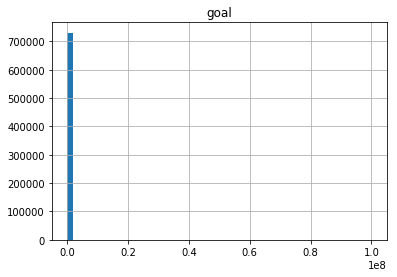

In [7]:
df.hist('goal', bins = 50)

In [ ]:
sortbyPrice = df.sort_values('converted_pledged_amount', axis = 0, ascending = False)

In [8]:
bins = [1000, 3000, 7000, 15000, 50000, 150000, 1000000]

In [ ]:
sortbyPrice.head()

In [9]:
df.hist('converted_pledged_amount', bins = bins)

KeyError: "['converted_pledged_amount'] not in index"

In [ ]:
mpl.pyplot.scatter(df['converted_pledged_amount'], df['backers_count'])

In [ ]:
mpl.pyplot.boxplot(mergedData['converted_pledged_amount'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a194067f0>]],
      dtype=object)

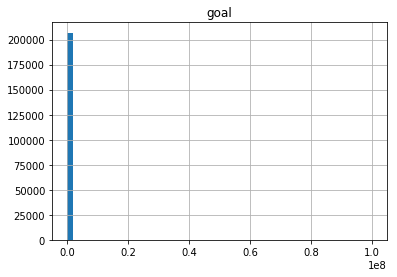

,Unnamed: 0,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
511,NaN,68929.0,Pebble is a customizable watch. Download new w...,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",10266845.0,US,1.332451e+09,"{""id"":597507018,""name"":""Pebble Technology"",""sl...",USD,$,...,pebble-e-paper-watch-for-iphone-and-android,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.337396e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",10266845.74,domestic
1651,NaN,68929.0,Pebble is a customizable watch. Download new w...,"{""id"":28,""name"":""Product Design"",""slug"":""desig...",10266845.0,US,1.332451e+09,"{""id"":597507018,""name"":""Pebble Technology"",""sl...",USD,$,...,pebble-e-paper-watch-for-iphone-and-android,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.337396e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",10266845.74,international
2335,NaN,63416.0,Cracking open the last closed platform: the TV...,"{""id"":270,""name"":""Gaming Hardware"",""slug"":""gam...",8596474.0,US,1.337045e+09,"{""id"":33844207,""name"":""OUYA"",""slug"":""ouya"",""is...",USD,$,...,ouya-a-new-kind-of-video-game-console,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.344492e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",8596474.58,international
2133,NaN,63416.0,Cracking open the last closed platform: the TV...,"{""id"":270,""name"":""Gaming Hardware"",""slug"":""gam...",8596474.0,US,1.337045e+09,"{""id"":33844207,""name"":""OUYA"",""slug"":""ouya"",""is...",USD,$,...,ouya-a-new-kind-of-video-game-console,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.344492e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",8596474.58,international
1682,NaN,69320.0,Yu Suzuki presents the long awaited third inst...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",6333295.0,US,1.433238e+09,"{""id"":1569150382,""name"":""Ys Net"",""slug"":""ysnet...",USD,$,...,shenmue-3,https://www.kickstarter.com/discover/categorie...,True,True,successful,1.437184e+09,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",6333295.77,international


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a227bbc88>]],
      dtype=object)

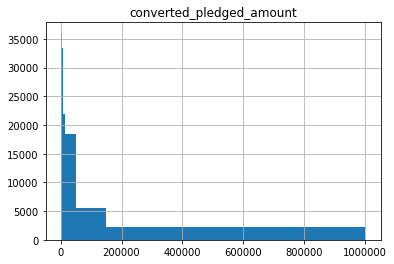

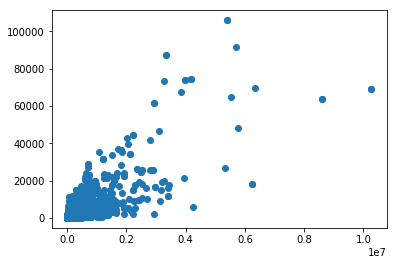

{'whiskers': [<matplotlib.lines.Line2D at 0x1a24b29160>,
 'caps': [<matplotlib.lines.Line2D at 0x1a24b297f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a24b20908>],
 'medians': [<matplotlib.lines.Line2D at 0x1a24b29e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a24b33208>],
 'means': []}

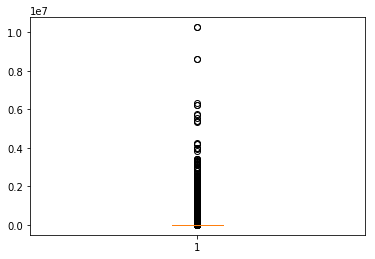